# Model Selection and Evaluation - Dataset2
By: Prajwal Brijesh Ainapur

This notebook focuses on the data preparation applied on UCI dataset to created the dataset2 as well as training and evaluating models from Pycaret as well as structure learning for generating and evaluating PGM models

In [1]:
#Importing Libraries
from collections import Counter
from imblearn.combine import SMOTEENN
from pycaret import classification, clustering
from pycaret.classification import *
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import seaborn as sns
import pycaret
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/prajwal_brijesh_ainapur/upgradSubmissions/MS_PGM/bank-additional/bank-additional-full.csv')
df = df.drop(columns = ['duration'], axis = 1)
df.shape

(41188, 20)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


As per the dataset description, the duration column is added only after the call is made with the customer and thus, this information is not available well in advance. Thus we proceed to remove this column in order to create a realistic prediction model.

In [4]:
cols = df.select_dtypes(exclude=["number","bool_"]).columns

In [5]:
# cols = list(df.columns.values)
# colsN = l
df[cols] = df[cols].apply(lambda x: pd.factorize(x)[0] + 1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
1,57,2,1,2,2,1,1,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
2,37,2,1,2,1,2,1,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
3,40,3,1,3,1,1,1,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1
4,56,2,1,2,1,1,2,1,1,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1


In [6]:
from imblearn.combine import SMOTEENN
from collections import Counter

def getSampled(x, y, tmp):
    
    _x, _y = tmp().fit_resample(x, y)
    counter= Counter(_y)
    print(counter)
    
    return _x, _y

In [7]:
df = df.drop(columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed'], axis = 1)
df.shape

(41188, 16)

y           1         2
age                    
98   0.000000  1.000000
95   1.000000  0.000000
94   1.000000  0.000000
92   0.250000  0.750000
91   1.000000  0.000000
89   0.000000  1.000000
88   0.590909  0.409091
87   0.000000  1.000000
86   0.375000  0.625000
85   0.533333  0.466667
84   0.571429  0.428571
83   0.529412  0.470588
82   0.352941  0.647059
81   0.600000  0.400000
80   0.419355  0.580645
79   0.500000  0.500000
78   0.481481  0.518519
77   0.350000  0.650000
76   0.470588  0.529412
75   0.541667  0.458333
74   0.531250  0.468750
73   0.617647  0.382353
72   0.617647  0.382353
71   0.603774  0.396226
70   0.595745  0.404255
69   0.588235  0.411765
68   0.545455  0.454545
67   0.576923  0.423077
66   0.491228  0.508772
65   0.477273  0.522727
64   0.526316  0.473684
63   0.690909  0.309091
62   0.596774  0.403226
61   0.561644  0.438356
60   0.795053  0.204947
59   0.850972  0.149028
58   0.899306  0.100694
57   0.904025  0.095975
56   0.886364  0.113636
55   0.913580  0

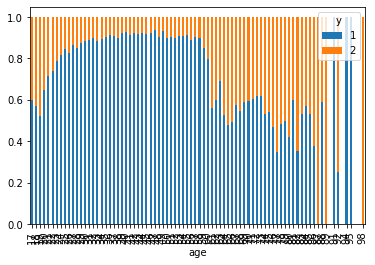

In [8]:
tt1 = pd.crosstab(df.age, df.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'age', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [9]:
binAge = [16, 20, 61, 100]
labelAge = [0, 1, 2]
df1 = df.copy()
df1['age'] = pd.cut(df['age'], bins = binAge, labels = labelAge)

y           1         2
age                    
2    0.543608  0.456392
1    0.895526  0.104474
0    0.592857  0.407143


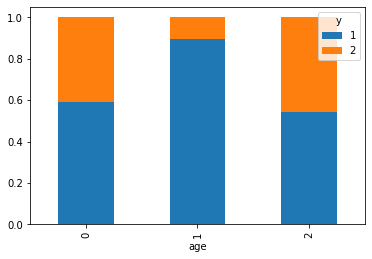

In [10]:
tt1 = pd.crosstab(df1.age, df1.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'age', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

y                1         2
campaign                    
56        1.000000  0.000000
43        1.000000  0.000000
42        1.000000  0.000000
41        1.000000  0.000000
40        1.000000  0.000000
39        1.000000  0.000000
37        1.000000  0.000000
35        1.000000  0.000000
34        1.000000  0.000000
33        1.000000  0.000000
32        1.000000  0.000000
31        1.000000  0.000000
30        1.000000  0.000000
29        1.000000  0.000000
28        1.000000  0.000000
27        1.000000  0.000000
26        1.000000  0.000000
25        1.000000  0.000000
24        1.000000  0.000000
23        0.937500  0.062500
22        1.000000  0.000000
21        1.000000  0.000000
20        1.000000  0.000000
19        1.000000  0.000000
18        1.000000  0.000000
17        0.931034  0.068966
16        1.000000  0.000000
15        0.960784  0.039216
14        0.985507  0.014493
13        0.956522  0.043478
12        0.976000  0.024000
11        0.932203  0.067797
10        0.94

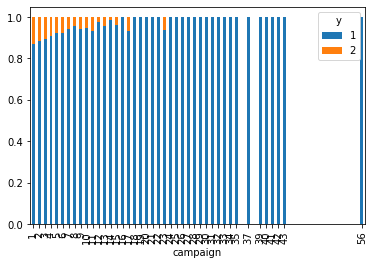

In [11]:
tt1 = pd.crosstab(df.campaign, df.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'campaign', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [12]:
bins = [0, 3, 15, 56]
labels = [0, 1, 2]
df2 = df1.copy()
df2['campaign'] = pd.cut(df['campaign'], bins = bins, labels = labels)

y             1     2
campaign             
2           350     5
1          6730   550
0         29468  4085


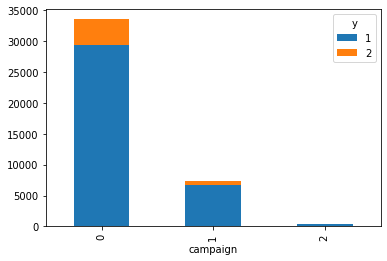

In [13]:
tt1 = pd.crosstab(df2.campaign, df2.y).sort_values(by = 'campaign', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

hi


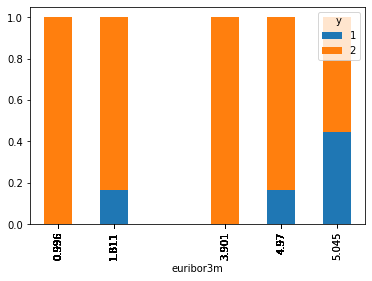

In [14]:
tt1 = pd.crosstab(df.euribor3m, df.y).apply(lambda r: r/r.sum(), axis=1)
# print(tt1)
print('hi')
ax = tt1.plot.bar(stacked = True)
plt.show()

In [15]:
df3 = df2.copy()

df3['euribor3m'] = df3.euribor3m.apply(lambda i : round(i))
# tmp1 = tt1.loc[tt1.yes < 0.4]
# tmp1 = tt1.loc[tt1.yes < 0.8]
df3.euribor3m.unique()

array([5, 4, 3, 2, 1])

y                 1         2
euribor3m                    
5          0.951966  0.048034
4          0.949694  0.050306
3          0.800000  0.200000
2          0.553191  0.446809
1          0.759761  0.240239


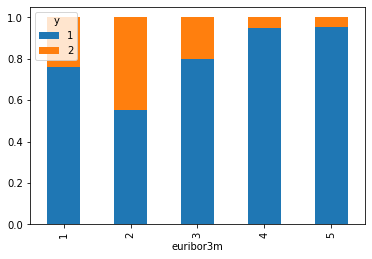

In [16]:
tt1 = pd.crosstab(df3.euribor3m, df2.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'euribor3m', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

y                1         2
previous                    
7         1.000000  0.000000
6         0.400000  0.600000
5         0.277778  0.722222
4         0.457143  0.542857
3         0.407407  0.592593
2         0.535809  0.464191
1         0.787985  0.212015
0         0.911678  0.088322


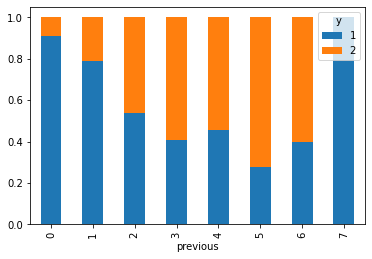

In [17]:
tt1 = pd.crosstab(df3.previous, df2.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'previous', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [18]:
tmp1 = [6,5,4,3,2]

df4 = df3.copy()

df4.previous = df4.previous.apply(lambda i: 1 if i in tmp1 else 0)
df4.previous.unique()

array([0, 1])

y               1        2
previous                  
1         0.49953  0.50047
0         0.89762  0.10238


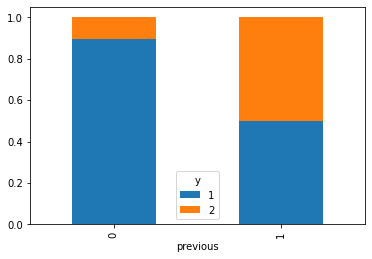

In [19]:
tt1 = pd.crosstab(df4.previous, df2.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'previous', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [20]:
dfMod1 = df4.copy()

from collections import Counter
X = dfMod1.drop(columns = ['y'], axis = 1)
y = dfMod1['y']

y = y.replace('no', 0)
y = y.replace('yes', 1)
counter = Counter(y)
print(counter)

Counter({1: 36548, 2: 4640})


y             1         2
pdays                    
999    0.907418  0.092582
27     0.000000  1.000000
26     0.000000  1.000000
25     0.000000  1.000000
22     0.333333  0.666667
21     0.000000  1.000000
20     1.000000  0.000000
19     0.666667  0.333333
18     0.428571  0.571429
17     0.750000  0.250000
16     0.454545  0.545455
15     0.333333  0.666667
14     0.450000  0.550000
13     0.222222  0.777778
12     0.551724  0.448276
11     0.464286  0.535714
10     0.423077  0.576923
9      0.453125  0.546875
8      0.333333  0.666667
7      0.333333  0.666667
6      0.298544  0.701456
5      0.369565  0.630435
4      0.466102  0.533898
3      0.321185  0.678815
2      0.393443  0.606557
1      0.692308  0.307692
0      0.333333  0.666667


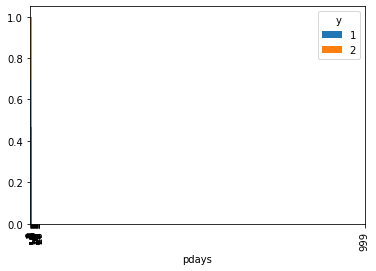

In [21]:
tt1 = pd.crosstab(df4.pdays, df2.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'pdays', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [22]:
df5 = df4.copy()

df5.pdays = df5.pdays.apply(lambda i: 1 if i in tmp1 else i)
df5.pdays.unique()

array([999,   1,   0,  10,   7,   8,   9,  11,  12,  13,  14,  15,  16,
        21,  17,  18,  22,  25,  26,  19,  27,  20])

In [23]:
# df5 = df4.copy()

df5.pdays = df5.pdays.apply(lambda i: 2 if i == 999 else i)
df5.pdays.unique()

array([ 2,  1,  0, 10,  7,  8,  9, 11, 12, 13, 14, 15, 16, 21, 17, 18, 22,
       25, 26, 19, 27, 20])

In [24]:
# df5 = df4.copy()

df5.pdays = df5.pdays.apply(lambda i: 0 if i != 1 and i != 2 else i)
df5.pdays.unique()

array([2, 1, 0])

y             1         2
pdays                    
2      0.907418  0.092582
1      0.343013  0.656987
0      0.411622  0.588378


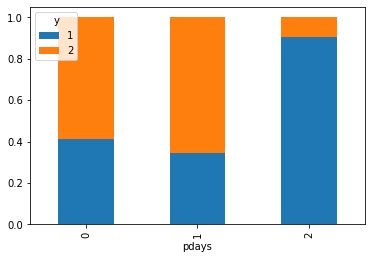

In [25]:
tt1 = pd.crosstab(df5.pdays, df2.y).apply(lambda r: r/r.sum(), axis=1).sort_values(by = 'pdays', ascending = False)
print(tt1)
ax = tt1.plot.bar(stacked = True)
plt.show()

In [26]:
df5.y = df5.y.apply(lambda i: 'yes' if i == 2 else 'no')

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'euribor3m', 'y'],
      dtype='object')

In [28]:
dfMod1 = df5.copy()

from collections import Counter
X = dfMod1.drop(columns = ['y'], axis = 1)
y = dfMod1['y']

y = y.replace('no', 0)
y = y.replace('yes', 1)
counter = Counter(y)
print(counter)

Counter({0: 36548, 1: 4640})


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25)

In [30]:
dfTrain = pd.concat([X_train, y_train], axis = 1)
# dfTest = pd.concat([X_test, y_train], axis = 1)
dfTrain.shape

(30891, 16)

In [31]:
X = dfTrain.drop(columns = ['y'], axis = 1)
y = dfTrain['y']

X1, y1 = getSampled(X, y, SMOTEENN)

cols = df.columns

dfs = [X1, y1]
dfTrain = pd.concat(dfs, axis = 1)
dfTrain.head()
# X1.concat

Counter({1: 19412, 0: 16120})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,euribor3m,y
0,1,1,1,1,2,2,1,2,3,3,0,2,0,1,5,0
1,1,5,2,5,2,1,2,1,2,1,0,2,0,1,5,0
2,1,11,1,7,2,1,1,2,3,1,0,2,0,1,5,0
3,1,3,3,7,1,2,1,2,6,5,0,2,0,1,4,0
4,1,1,1,1,1,1,1,2,3,1,1,2,0,1,5,0


In [32]:
def getSampled(x, y, tmp):
    
    _x, _y = tmp().fit_resample(x, y)
    counter= Counter(_y)
    print(counter)
    
    return _x, _y

def trainPredict(modelName):

    model = create_model(modelName)
    return model


def plotModel(fittedModel, xTest, yTest, title = None):    
    
    model_final = finalize_model(fittedModel)

    y_pred = predict_model(model_final, data = xTest)

    cmat = confusion_matrix(yTest, y_pred.Label)
    print(cmat)
    trec = recall_score(yTest, y_pred.Label)
    print(trec)
    
    fpr, tpr, thresholds = metrics.roc_curve(yTest, y_pred.Label)
    roc_auc = (metrics.auc(fpr, tpr))

    plt.title('Receiver Operating Characteristic' + str(title))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [33]:
df_tmp = pd.concat([X1, y1], axis = 1)
classification_setup = classification.setup(data= df_tmp, target='y', fix_imbalance = False)

def trainPlotWrapper(modelName):
    modelL = trainPredict(modelName)
    plotModel(modelL, X_test, y_test)
#     print(modelL)
    return modelL

def TunePlotWrapper(modelL):
    tunedModelL = tune_model(modelL, optimize = 'AUC')
    plotModel(tunedModelL, X_test, y_test)
    print(modelL, '\n', tunedModelL)
#     return modelL, tunedModelL

,Description,Value
0,session_id,1919
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(35532, 16)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9483,0.9866,0.9490,0.9562,0.9526,0.8958,0.8959
1,0.9496,0.9877,0.9468,0.9605,0.9536,0.8984,0.8985
2,0.9418,0.9847,0.9453,0.9481,0.9467,0.8826,0.8826
3,0.9389,0.9840,0.9272,0.9596,0.9432,0.8771,0.8777
4,0.9483,0.9854,0.9452,0.9596,0.9524,0.8959,0.8960
5,0.9495,0.9866,0.9482,0.9590,0.9536,0.8983,0.8984
6,0.9512,0.9871,0.9475,0.9627,0.9550,0.9017,0.9018
7,0.9442,0.9854,0.9468,0.9511,0.9489,0.8875,0.8875
8,0.9409,0.9871,0.9325,0.9584,0.9453,0.8811,0.8815
9,0.9442,0.9846,0.9468,0.9511,0.9489,0.8875,0.8875


[[7380 1757]
 [ 423  737]]
0.6353448275862069


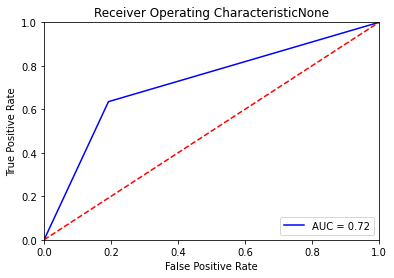

In [37]:
tmp0 = trainPlotWrapper('catboost')

In [38]:
def TunePlotWrapper(modelL):
    tunedModelL = tune_model(modelL, optimize = 'AUC')
    plotModel(tunedModelL, X_test, y_test)
    print(modelL, '\n', tunedModelL)
    return modelL, tunedModelL

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9270,0.9799,0.9123,0.9523,0.9319,0.8534,0.8543
1,0.9225,0.9784,0.9078,0.9483,0.9276,0.8443,0.8453
2,0.9151,0.9752,0.9070,0.9358,0.9212,0.8293,0.8298
3,0.9061,0.9753,0.8837,0.9409,0.9114,0.8117,0.8135
4,0.9196,0.9761,0.9062,0.9445,0.9250,0.8385,0.8393
5,0.9212,0.9799,0.9077,0.9461,0.9265,0.8418,0.8426
6,0.9204,0.9797,0.9070,0.9453,0.9258,0.8401,0.8409
7,0.9229,0.9769,0.9175,0.9401,0.9287,0.8448,0.8451
8,0.9208,0.9789,0.9048,0.9482,0.9260,0.8410,0.8421
9,0.9171,0.9770,0.9033,0.9429,0.9227,0.8335,0.8344


[[7389 1748]
 [ 405  755]]
0.6508620689655172


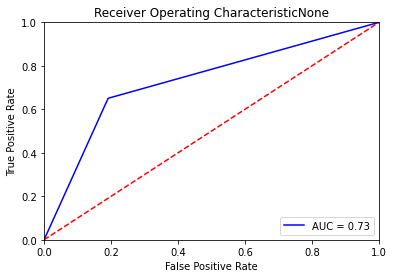

In [39]:
m0, m1 = TunePlotWrapper(tmp0)

In [41]:
print(m0.get_params(), '\n',m1.get_params())

{'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 2154} 
 {'depth': 11, 'l2_leaf_reg': 9, 'border_count': 254, 'verbose': False, 'random_strength': 0.6, 'task_type': 'CPU', 'n_estimators': 130, 'random_state': 2154}


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9147,0.9758,0.9010,0.9409,0.9205,0.8285,0.8294
1,0.9253,0.9797,0.9047,0.9567,0.9300,0.8500,0.8515
2,0.9216,0.9760,0.8958,0.9586,0.9261,0.8428,0.8450
3,0.9056,0.9736,0.8846,0.9399,0.9114,0.8107,0.8124
4,0.9244,0.9765,0.9121,0.9481,0.9298,0.8480,0.8488
5,0.9216,0.9779,0.9062,0.9486,0.9269,0.8424,0.8434
6,0.9269,0.9775,0.9159,0.9491,0.9322,0.8529,0.8536
7,0.9187,0.9728,0.9016,0.9475,0.9240,0.8367,0.8379
8,0.9175,0.9784,0.9009,0.9460,0.9229,0.8343,0.8354
9,0.9175,0.9792,0.8994,0.9474,0.9228,0.8343,0.8356


[[7444 1693]
 [ 384  776]]
0.6689655172413793


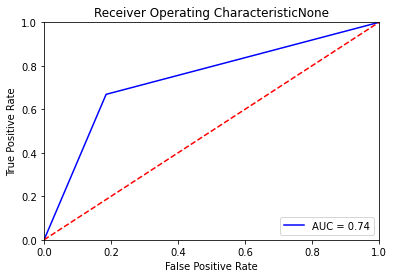

In [34]:
tmp1 = trainPlotWrapper('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9143,0.9747,0.8995,0.9415,0.9200,0.8277,0.8287
1,0.9273,0.9793,0.9106,0.9547,0.9322,0.8540,0.8551
2,0.9232,0.9760,0.9039,0.9537,0.9281,0.8459,0.8473
3,0.9171,0.9755,0.9002,0.9460,0.9225,0.8334,0.8346
4,0.9257,0.9774,0.9136,0.9490,0.9310,0.8505,0.8512
5,0.9179,0.9780,0.9010,0.9468,0.9233,0.8351,0.8363
6,0.9232,0.9774,0.9136,0.9446,0.9288,0.8455,0.8460
7,0.9122,0.9731,0.8972,0.9399,0.9180,0.8236,0.8246
8,0.9232,0.9793,0.9083,0.9494,0.9284,0.8457,0.8466
9,0.9167,0.9799,0.9046,0.9411,0.9225,0.8325,0.8332


[[7438 1699]
 [ 399  761]]
0.6560344827586206


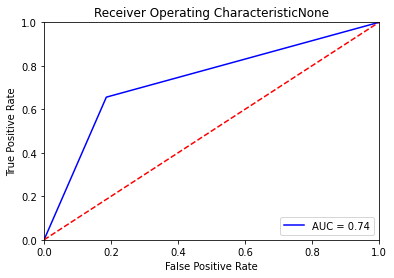

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3695, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 
 LGBMClassifier(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.039, max_depth=-1,
               min_child_samples=10, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=220, n_jobs=-1, num_leaves=200, objective=None,
               random_state=3695, reg_alpha=0.3, reg_lambda=1e-07, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [35]:
TunePlotWrapper(tmp1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9803,0.9976,0.9853,0.9789,0.9821,0.9602,0.9602
1,0.9811,0.9985,0.9905,0.9755,0.9829,0.9618,0.9619
2,0.9795,0.9978,0.9824,0.9803,0.9813,0.9586,0.9586
3,0.9847,0.9988,0.9883,0.9840,0.9861,0.9691,0.9691
4,0.9823,0.9984,0.9868,0.9811,0.9839,0.9643,0.9643
5,0.9839,0.9979,0.9875,0.9832,0.9854,0.9675,0.9675
6,0.9791,0.9974,0.9839,0.9781,0.9810,0.9578,0.9578
7,0.9823,0.9975,0.9875,0.9803,0.9839,0.9643,0.9643
8,0.9851,0.9986,0.9875,0.9854,0.9865,0.9700,0.9700
9,0.9799,0.9976,0.9839,0.9796,0.9817,0.9594,0.9594


[[7613 1524]
 [ 474  686]]
0.5913793103448276


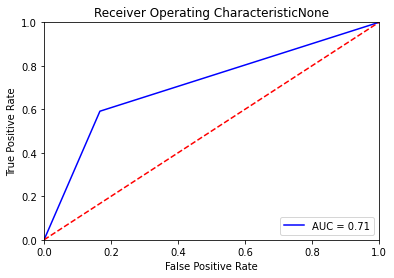

In [34]:
tmp2 = trainPlotWrapper('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8545,0.9488,0.8088,0.9162,0.8591,0.7099,0.7158
1,0.8645,0.9493,0.8308,0.9145,0.8706,0.7292,0.7329
2,0.8729,0.9532,0.8337,0.9275,0.8781,0.7462,0.7508
3,0.8766,0.9529,0.8432,0.9252,0.8823,0.7531,0.7567
4,0.8754,0.9517,0.8447,0.9217,0.8815,0.7506,0.7537
5,0.8770,0.9510,0.8484,0.9212,0.8833,0.7537,0.7565
6,0.8657,0.9486,0.8218,0.9249,0.8703,0.7321,0.7376
7,0.8593,0.9445,0.8211,0.9135,0.8649,0.7189,0.7234
8,0.8721,0.9544,0.8460,0.9144,0.8789,0.7439,0.7464
9,0.8673,0.9486,0.8358,0.9149,0.8736,0.7346,0.7379


[[7244 1893]
 [ 387  773]]
0.6663793103448276


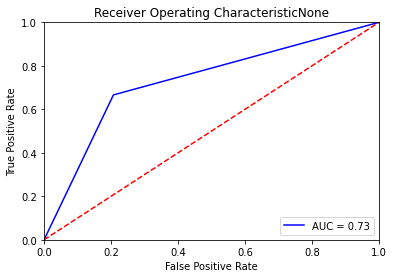

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1919, verbose=0,
                       warm_start=False) 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs

In [35]:
TunePlotWrapper(tmp2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9819,0.9982,0.9861,0.9810,0.9836,0.9635,0.9635
1,0.9811,0.9988,0.9897,0.9762,0.9829,0.9618,0.9619
2,0.9803,0.9986,0.9802,0.9838,0.9820,0.9602,0.9602
3,0.9859,0.9988,0.9875,0.9868,0.9872,0.9716,0.9716
4,0.9835,0.9989,0.9868,0.9832,0.9850,0.9667,0.9667
5,0.9843,0.9987,0.9875,0.9839,0.9857,0.9683,0.9683
6,0.9823,0.9980,0.9839,0.9839,0.9839,0.9643,0.9643
7,0.9835,0.9979,0.9883,0.9818,0.9850,0.9667,0.9667
8,0.9867,0.9983,0.9875,0.9883,0.9879,0.9732,0.9732
9,0.9823,0.9984,0.9853,0.9825,0.9839,0.9643,0.9643


[[7677 1460]
 [ 489  671]]
0.5784482758620689


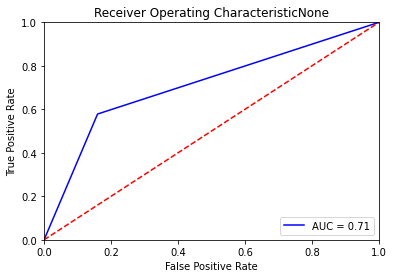

In [36]:
tmp3 = trainPlotWrapper('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8545,0.9479,0.8081,0.9169,0.8590,0.7099,0.7160
1,0.8662,0.9497,0.8337,0.9148,0.8724,0.7323,0.7358
2,0.8762,0.9530,0.8425,0.9252,0.8819,0.7523,0.7560
3,0.8774,0.9521,0.8432,0.9267,0.8830,0.7548,0.7585
4,0.8766,0.9516,0.8476,0.9212,0.8829,0.7529,0.7558
5,0.8741,0.9501,0.8359,0.9276,0.8794,0.7486,0.7530
6,0.8685,0.9478,0.8262,0.9260,0.8733,0.7376,0.7428
7,0.8645,0.9446,0.8270,0.9178,0.8700,0.7293,0.7336
8,0.8697,0.9551,0.8424,0.9134,0.8764,0.7392,0.7419
9,0.8641,0.9486,0.8350,0.9097,0.8708,0.7280,0.7310


[[7295 1842]
 [ 391  769]]
0.6629310344827586


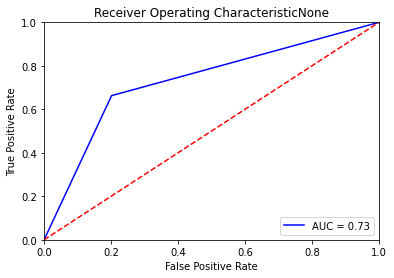

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1919, verbose=0,
                     warm_start=False) 
 ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=9, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0001, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_

In [37]:
TunePlotWrapper(tmp3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9735,0.9720,0.9873,0.9650,0.9761,0.9463,0.9466
1,0.9706,0.9691,0.9851,0.9622,0.9735,0.9405,0.9409
2,0.9735,0.9721,0.9866,0.9657,0.9760,0.9463,0.9466
3,0.9706,0.9692,0.9844,0.9628,0.9735,0.9405,0.9408
4,0.9763,0.9756,0.9836,0.9735,0.9785,0.9522,0.9522
5,0.9698,0.9685,0.9821,0.9635,0.9727,0.9389,0.9391
6,0.9698,0.9677,0.9896,0.9568,0.9729,0.9388,0.9395
7,0.9714,0.9698,0.9866,0.9622,0.9743,0.9422,0.9425
8,0.9682,0.9668,0.9814,0.9613,0.9713,0.9356,0.9358
9,0.9751,0.9741,0.9844,0.9706,0.9774,0.9496,0.9498


[[7328 1809]
 [ 465  695]]
0.5991379310344828


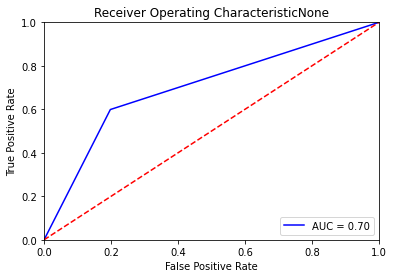

In [56]:
tmp = trainPlotWrapper('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8722,0.9338,0.8197,0.9394,0.8754,0.7456,0.7529
1,0.8567,0.9241,0.8063,0.9224,0.8604,0.7146,0.7215
2,0.8624,0.9317,0.8159,0.9241,0.8666,0.7258,0.7318
3,0.8527,0.9255,0.7966,0.9239,0.8555,0.7069,0.7150
4,0.8600,0.9279,0.8040,0.9310,0.8629,0.7214,0.7295
5,0.8620,0.9281,0.8086,0.9306,0.8653,0.7253,0.7329
6,0.8600,0.9306,0.8243,0.9119,0.8659,0.7202,0.7243
7,0.8653,0.9302,0.8146,0.9311,0.8689,0.7317,0.7386
8,0.8633,0.9322,0.8168,0.9250,0.8675,0.7274,0.7334
9,0.8542,0.9229,0.7884,0.9355,0.8556,0.7106,0.7212


[[7471 1666]
 [ 398  762]]
0.656896551724138


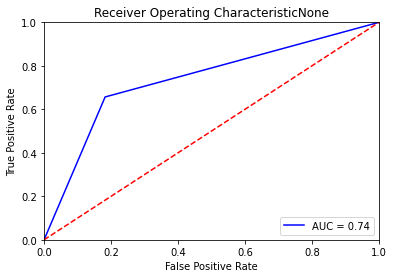

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3104, splitter='best') 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3104, splitter='best')


In [57]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8726,0.9481,0.8278,0.9323,0.8770,0.7458,0.7515
1,0.8806,0.9526,0.8513,0.9252,0.8867,0.7610,0.7640
2,0.8822,0.9529,0.8447,0.9344,0.8873,0.7646,0.7688
3,0.8874,0.9526,0.8571,0.9323,0.8931,0.7746,0.7777
4,0.8878,0.9518,0.8579,0.9323,0.8936,0.7754,0.7784
5,0.8854,0.9543,0.8505,0.9348,0.8907,0.7708,0.7746
6,0.8810,0.9489,0.8424,0.9341,0.8859,0.7622,0.7667
7,0.8705,0.9469,0.8394,0.9175,0.8767,0.7410,0.7442
8,0.8934,0.9584,0.8695,0.9317,0.8995,0.7864,0.7885
9,0.8782,0.9489,0.8475,0.9241,0.8841,0.7562,0.7593


[[7317 1820]
 [ 399  761]]
0.6560344827586206


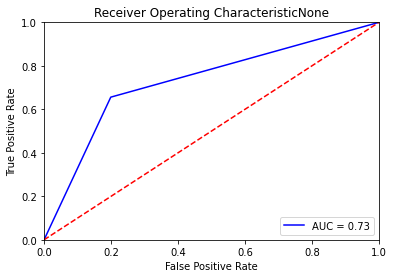

In [38]:
tmp4 = trainPlotWrapper('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9301,0.9799,0.9260,0.9454,0.9356,0.8591,0.8593
1,0.9325,0.9828,0.9443,0.9334,0.9388,0.8635,0.8636
2,0.9393,0.9835,0.9421,0.9470,0.9445,0.8775,0.8775
3,0.9429,0.9853,0.9443,0.9513,0.9478,0.8848,0.8848
4,0.9417,0.9841,0.9436,0.9499,0.9467,0.8824,0.8824
5,0.9461,0.9834,0.9421,0.9590,0.9505,0.8914,0.8916
6,0.9393,0.9809,0.9428,0.9463,0.9445,0.8775,0.8775
7,0.9349,0.9810,0.9384,0.9426,0.9405,0.8685,0.8686
8,0.9509,0.9860,0.9531,0.9573,0.9552,0.9010,0.9010
9,0.9433,0.9836,0.9494,0.9473,0.9484,0.8855,0.8855


[[7273 1864]
 [ 432  728]]
0.6275862068965518


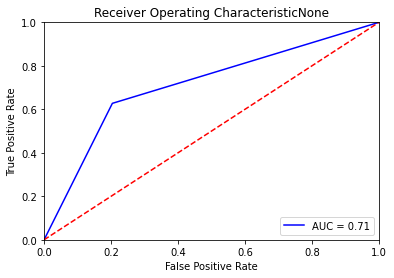

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1919, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.298, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.005, min_impurity_split=Non

In [39]:
TunePlotWrapper(tmp4)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8784,0.9468,0.8741,0.9009,0.8873,0.7553,0.7557
1,0.8706,0.9376,0.8674,0.8933,0.8802,0.7396,0.7400
2,0.8710,0.9406,0.8629,0.8977,0.8799,0.7407,0.7414
3,0.8673,0.9384,0.8569,0.8963,0.8762,0.7335,0.7343
4,0.8796,0.9441,0.8763,0.9011,0.8886,0.7577,0.7580
5,0.8682,0.9382,0.8608,0.8947,0.8774,0.7349,0.7356
6,0.8718,0.9420,0.8719,0.8919,0.8818,0.7419,0.7421
7,0.8743,0.9450,0.8667,0.9002,0.8832,0.7472,0.7478
8,0.8735,0.9420,0.8697,0.8964,0.8828,0.7454,0.7458
9,0.8620,0.9419,0.8450,0.8972,0.8703,0.7231,0.7246


[[7064 2073]
 [ 405  755]]
0.6508620689655172


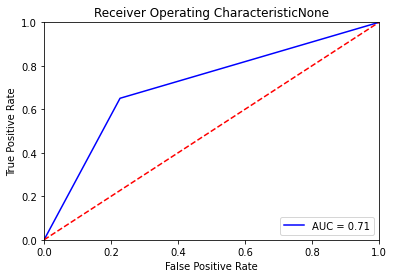

In [60]:
tmp = trainPlotWrapper('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8808,0.9463,0.8726,0.9063,0.8891,0.7604,0.7610
1,0.8710,0.9372,0.8651,0.8958,0.8802,0.7406,0.7411
2,0.8690,0.9399,0.8607,0.8960,0.8780,0.7366,0.7373
3,0.8678,0.9382,0.8532,0.9002,0.8761,0.7345,0.7357
4,0.8788,0.9436,0.8696,0.9054,0.8871,0.7563,0.7571
5,0.8690,0.9385,0.8615,0.8955,0.8782,0.7366,0.7372
6,0.8722,0.9421,0.8749,0.8902,0.8825,0.7426,0.7427
7,0.8743,0.9453,0.8719,0.8959,0.8838,0.7469,0.7473
8,0.8706,0.9420,0.8637,0.8964,0.8798,0.7398,0.7404
9,0.8644,0.9421,0.8472,0.8995,0.8726,0.7280,0.7295


[[7063 2074]
 [ 398  762]]
0.656896551724138


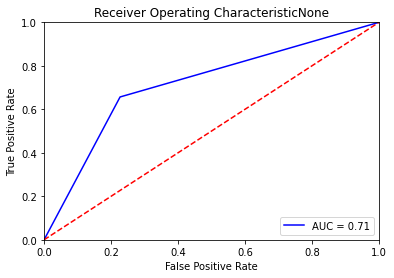

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3104) 
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.29,
                   n_estimators=250, random_state=3104)


In [61]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9518,0.9866,0.9694,0.9441,0.9566,0.9025,0.9029
1,0.9424,0.9827,0.9642,0.9329,0.9483,0.8834,0.8840
2,0.9522,0.9889,0.9694,0.9448,0.9570,0.9033,0.9037
3,0.9502,0.9845,0.9687,0.9420,0.9552,0.8992,0.8996
4,0.9588,0.9912,0.9799,0.9467,0.9630,0.9165,0.9172
5,0.9445,0.9855,0.9643,0.9364,0.9501,0.8876,0.8881
6,0.9469,0.9883,0.9702,0.9354,0.9525,0.8925,0.8932
7,0.9576,0.9873,0.9836,0.9416,0.9621,0.9139,0.9150
8,0.9576,0.9863,0.9792,0.9454,0.9620,0.9140,0.9147
9,0.9584,0.9901,0.9769,0.9486,0.9626,0.9157,0.9162


[[7703 1434]
 [ 590  570]]
0.49137931034482757


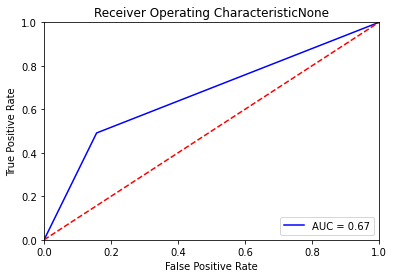

In [78]:
tmp = trainPlotWrapper('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9731,0.9974,0.9866,0.9650,0.9757,0.9455,0.9458
1,0.9694,0.9960,0.9933,0.9528,0.9726,0.9379,0.9390
2,0.9718,0.9974,0.9903,0.9596,0.9747,0.9430,0.9436
3,0.9706,0.9949,0.9866,0.9608,0.9735,0.9405,0.9409
4,0.9788,0.9983,0.9918,0.9701,0.9808,0.9571,0.9574
5,0.9653,0.9964,0.9881,0.9506,0.9690,0.9297,0.9306
6,0.9686,0.9964,0.9933,0.9515,0.9719,0.9363,0.9374
7,0.9669,0.9965,0.9911,0.9507,0.9705,0.9330,0.9340
8,0.9727,0.9959,0.9903,0.9610,0.9754,0.9446,0.9452
9,0.9747,0.9984,0.9925,0.9624,0.9773,0.9487,0.9493


[[7476 1661]
 [ 520  640]]
0.5517241379310345


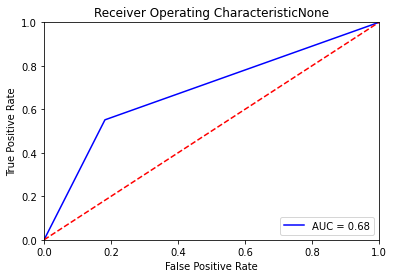

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform') 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='distance')


In [79]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8849,0.9477,0.8733,0.9128,0.8926,0.7687,0.7696
1,0.8747,0.9388,0.8681,0.8996,0.8836,0.7480,0.7486
2,0.8718,0.9417,0.8584,0.9028,0.8801,0.7427,0.7437
3,0.8678,0.9401,0.8539,0.8995,0.8761,0.7345,0.7356
4,0.8767,0.9447,0.8689,0.9025,0.8853,0.7522,0.7528
5,0.8690,0.9394,0.8608,0.8961,0.8781,0.7366,0.7373
6,0.8722,0.9431,0.8719,0.8925,0.8821,0.7427,0.7430
7,0.8731,0.9457,0.8652,0.8994,0.8820,0.7448,0.7454
8,0.8727,0.9438,0.8645,0.8993,0.8815,0.7440,0.7447
9,0.8685,0.9424,0.8510,0.9035,0.8764,0.7362,0.7377


[[7083 2054]
 [ 400  760]]
0.6551724137931034


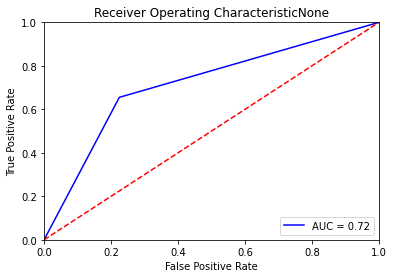

In [82]:
tmp = trainPlotWrapper('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8861,0.9477,0.8741,0.9143,0.8937,0.7712,0.7721
1,0.8735,0.9389,0.8681,0.8975,0.8826,0.7455,0.7460
2,0.8722,0.9417,0.8584,0.9035,0.8804,0.7435,0.7446
3,0.8673,0.9402,0.8539,0.8988,0.8758,0.7337,0.7348
4,0.8784,0.9447,0.8703,0.9040,0.8869,0.7555,0.7561
5,0.8698,0.9393,0.8615,0.8969,0.8788,0.7383,0.7390
6,0.8718,0.9432,0.8719,0.8919,0.8818,0.7419,0.7421
7,0.8731,0.9457,0.8652,0.8994,0.8820,0.7448,0.7454
8,0.8718,0.9439,0.8637,0.8985,0.8808,0.7423,0.7430
9,0.8689,0.9427,0.8510,0.9042,0.8768,0.7371,0.7386


[[7086 2051]
 [ 399  761]]
0.6560344827586206


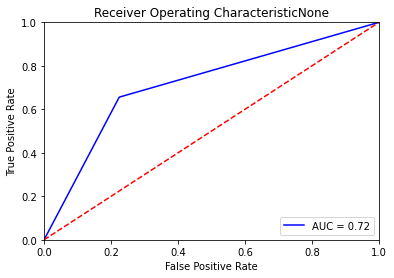

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3104, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
 LogisticRegression(C=4.985, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=3104, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [83]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8453,0.9094,0.8040,0.9029,0.8506,0.6913,0.6963
1,0.8241,0.8914,0.7809,0.8844,0.8294,0.6493,0.6546
2,0.8396,0.9039,0.7981,0.8977,0.8450,0.6800,0.6850
3,0.8355,0.8941,0.7943,0.8935,0.8410,0.6718,0.6768
4,0.8453,0.9036,0.8122,0.8956,0.8519,0.6908,0.6944
5,0.7922,0.8951,0.6746,0.9264,0.7807,0.5924,0.6195
6,0.7906,0.8980,0.6791,0.9175,0.7805,0.5887,0.6132
7,0.8392,0.9028,0.8004,0.8951,0.8451,0.6790,0.6836
8,0.8282,0.8956,0.7937,0.8810,0.8351,0.6567,0.6606
9,0.8326,0.8970,0.7750,0.9059,0.8353,0.6672,0.6756


[[7338 1799]
 [ 437  723]]
0.6232758620689656


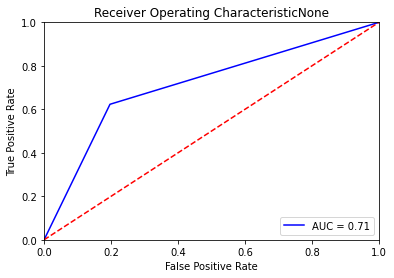

In [84]:
tmp = trainPlotWrapper('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7416,0.9119,0.5462,0.9683,0.6984,0.5015,0.5650
1,0.7363,0.8936,0.5462,0.9519,0.6941,0.4907,0.5498
2,0.7412,0.9058,0.5425,0.9733,0.6967,0.5010,0.5668
3,0.7343,0.8974,0.5343,0.9650,0.6878,0.4878,0.5531
4,0.7453,0.9048,0.5537,0.9674,0.7043,0.5081,0.5698
5,0.7331,0.8981,0.5391,0.9539,0.6889,0.4850,0.5462
6,0.7380,0.9012,0.5495,0.9523,0.6969,0.4938,0.5523
7,0.7363,0.9053,0.5458,0.9532,0.6941,0.4909,0.5504
8,0.7424,0.8969,0.5525,0.9611,0.7017,0.5026,0.5628
9,0.7338,0.9004,0.5365,0.9600,0.6883,0.4866,0.5500


[[8466  671]
 [ 659  501]]
0.43189655172413793


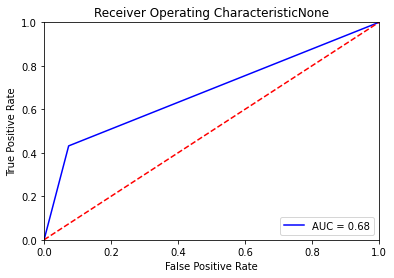

GaussianNB(priors=None, var_smoothing=1e-09) 
 GaussianNB(priors=None, var_smoothing=0.008)


In [85]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8812,0.0000,0.8621,0.9161,0.8883,0.7617,0.7633
1,0.8727,0.0000,0.8383,0.9221,0.8782,0.7454,0.7491
2,0.8624,0.0000,0.8256,0.9149,0.8680,0.7252,0.7294
3,0.8514,0.0000,0.7705,0.9486,0.8503,0.7060,0.7211
4,0.8792,0.0000,0.8718,0.9042,0.8877,0.7571,0.7576
5,0.8596,0.0000,0.8079,0.9266,0.8632,0.7204,0.7275
6,0.8792,0.0000,0.8622,0.9125,0.8867,0.7575,0.7589
7,0.8808,0.0000,0.8667,0.9115,0.8885,0.7607,0.7618
8,0.8645,0.0000,0.8124,0.9317,0.8679,0.7301,0.7374
9,0.8661,0.0000,0.8763,0.8789,0.8776,0.7297,0.7297


[[7294 1843]
 [ 404  756]]
0.6517241379310345


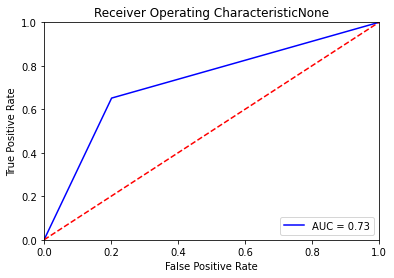

In [86]:
tmp = trainPlotWrapper('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8584,0.0000,0.8294,0.9041,0.8651,0.7166,0.7196
1,0.8420,0.0000,0.8085,0.8930,0.8487,0.6843,0.6880
2,0.8527,0.0000,0.8167,0.9050,0.8586,0.7056,0.7097
3,0.8482,0.0000,0.8092,0.9035,0.8538,0.6969,0.7014
4,0.8571,0.0000,0.8137,0.9161,0.8619,0.7150,0.7204
5,0.8539,0.0000,0.8206,0.9040,0.8603,0.7079,0.7115
6,0.8522,0.0000,0.8235,0.8985,0.8594,0.7044,0.7073
7,0.8584,0.0000,0.8250,0.9082,0.8646,0.7168,0.7205
8,0.8531,0.0000,0.8258,0.8980,0.8604,0.7059,0.7087
9,0.8469,0.0000,0.7906,0.9186,0.8498,0.6954,0.7036


[[7195 1942]
 [ 379  781]]
0.6732758620689655


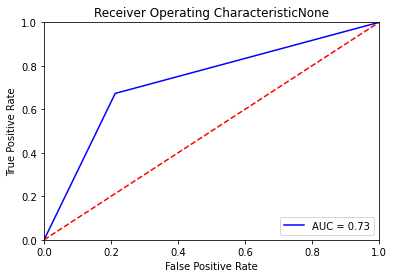

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=3104, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
 SGDClassifier(alpha=0.005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.4800000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=3104,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)


In [87]:
TunePlotWrapper(tmp)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8661,0.0000,0.8331,0.9149,0.8721,0.7323,0.7358
1,0.8555,0.0000,0.8241,0.9036,0.8620,0.7110,0.7144
2,0.8588,0.0000,0.8323,0.9023,0.8659,0.7173,0.7199
3,0.8567,0.0000,0.8182,0.9112,0.8622,0.7139,0.7184
4,0.8641,0.0000,0.8249,0.9187,0.8693,0.7286,0.7332
5,0.8571,0.0000,0.8332,0.8988,0.8648,0.7138,0.7161
6,0.8555,0.0000,0.8302,0.8985,0.8630,0.7107,0.7131
7,0.8665,0.0000,0.8340,0.9150,0.8726,0.7331,0.7366
8,0.8596,0.0000,0.8325,0.9038,0.8667,0.7189,0.7216
9,0.8522,0.0000,0.8040,0.9160,0.8563,0.7054,0.7118


[[7180 1957]
 [ 398  762]]
0.656896551724138


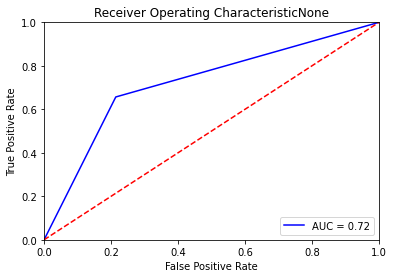

In [88]:
tmp = trainPlotWrapper('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8657,0.0000,0.8331,0.9141,0.8717,0.7315,0.7349
1,0.8555,0.0000,0.8241,0.9036,0.8620,0.7110,0.7144
2,0.8592,0.0000,0.8323,0.9030,0.8662,0.7181,0.7208
3,0.8571,0.0000,0.8189,0.9113,0.8626,0.7147,0.7191
4,0.8641,0.0000,0.8249,0.9187,0.8693,0.7286,0.7332
5,0.8571,0.0000,0.8332,0.8988,0.8648,0.7138,0.7161
6,0.8555,0.0000,0.8302,0.8985,0.8630,0.7107,0.7131
7,0.8669,0.0000,0.8347,0.9151,0.8731,0.7339,0.7373
8,0.8596,0.0000,0.8325,0.9038,0.8667,0.7189,0.7216
9,0.8522,0.0000,0.8040,0.9160,0.8563,0.7054,0.7118


[[7179 1958]
 [ 398  762]]
0.656896551724138


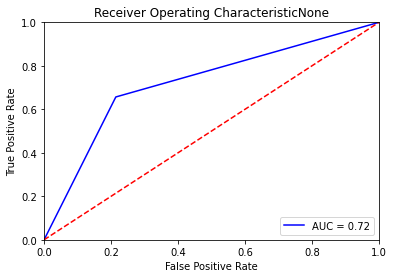

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3104,
                solver='auto', tol=0.001) 
 RidgeClassifier(alpha=6.97, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3104,
                solver='auto', tol=0.001)


In [89]:
TunePlotWrapper(tmp)

## Model Stacking  / Blending

In This section, the sophisticated procedure from pycaret to train and tune is utilized to reduce the time taken to analyze the blending and stacking of models trained on this dataset

In [35]:
from pycaret.classification import *

top10 = compare_models(sort = 'AUC', n_select = 10, exclude = ['catboost', 'xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9841,0.9985,0.9878,0.9832,0.9855,0.9680,0.9680,1.2310
rf,Random Forest Classifier,0.9830,0.9981,0.9885,0.9804,0.9844,0.9656,0.9657,1.0590
knn,K Neighbors Classifier,0.9526,0.9874,0.9710,0.9437,0.9571,0.9042,0.9048,7.4440
lightgbm,Light Gradient Boosting Machine,0.9269,0.9798,0.9177,0.9465,0.9319,0.8531,0.8537,0.2100
dt,Decision Tree Classifier,0.9723,0.9711,0.9853,0.9646,0.9749,0.9441,0.9444,0.0860
gbc,Gradient Boosting Classifier,0.8923,0.9559,0.8712,0.9267,0.8980,0.7841,0.7859,1.7300
lr,Logistic Regression,0.8828,0.9484,0.8740,0.9073,0.8903,0.7645,0.7652,0.8980
ada,Ada Boost Classifier,0.8798,0.9467,0.8734,0.9028,0.8878,0.7585,0.7591,0.5220
lda,Linear Discriminant Analysis,0.8708,0.9429,0.8473,0.9093,0.8771,0.7413,0.7434,0.2800
nb,Naive Bayes,0.7997,0.9080,0.6798,0.9355,0.7858,0.6070,0.6357,0.0350


In [39]:
# del top10[-2]
# top10
tuned_top10 = [tune_model(i) for i in top10]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8165,0.9099,0.7096,0.9383,0.8081,0.6386,0.6616
1,0.7676,0.9097,0.6007,0.9564,0.7379,0.5480,0.5962
2,0.8007,0.9144,0.6763,0.9412,0.7871,0.6090,0.6386
3,0.8052,0.9061,0.7015,0.9221,0.7968,0.6162,0.6376
4,0.7991,0.9119,0.6805,0.9320,0.7866,0.6054,0.6323
5,0.7603,0.9091,0.5901,0.9510,0.7283,0.5340,0.5831
6,0.7950,0.9005,0.6746,0.9295,0.7818,0.5975,0.6250
7,0.8491,0.9097,0.7999,0.9121,0.8523,0.6994,0.7057
8,0.8055,0.9033,0.6901,0.9357,0.7944,0.6177,0.6436
9,0.7982,0.9059,0.6746,0.9372,0.7845,0.6041,0.6331


In [45]:
# tuned_top10[0:4]
blender = blend_models(estimator_list = [tuned_top10[0], tuned_top10[1], tuned_top10[2], tuned_top10[3], tuned_top10[4]], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9451,0.9889,0.9444,0.9543,0.9494,0.8895,0.8896
1,0.9435,0.9888,0.9430,0.9528,0.9479,0.8863,0.8863
2,0.9512,0.9904,0.9430,0.9666,0.9546,0.9018,0.9022
3,0.9375,0.9870,0.9459,0.9397,0.9428,0.8739,0.8739
4,0.9568,0.9924,0.9600,0.9607,0.9603,0.9130,0.9130
5,0.9500,0.9918,0.9437,0.9637,0.9536,0.8993,0.8996
6,0.9504,0.9902,0.9466,0.9616,0.9541,0.9001,0.9002
7,0.9516,0.9915,0.9459,0.9645,0.9551,0.9026,0.9028
8,0.9496,0.9895,0.9437,0.9629,0.9532,0.8985,0.8987
9,0.9399,0.9896,0.9259,0.9622,0.9437,0.8792,0.8800


[[7468 1669]
 [ 431  729]]
0.628448275862069


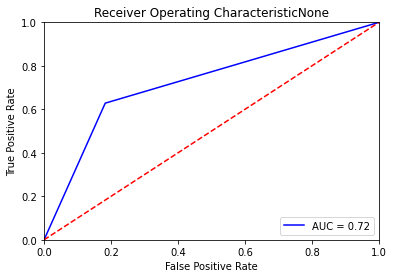

In [46]:
plotModel(blender, X_test, y_test)

In [49]:
stacker = stack_models(estimator_list = [tuned_top10[0], tuned_top10[1], tuned_top10[2], tuned_top10[3]], meta_model = tuned_top10[-3])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9774,0.9939,0.9933,0.9661,0.9795,0.9543,0.9548
1,0.9806,0.9933,0.9859,0.9787,0.9823,0.9609,0.9610
2,0.9839,0.9938,0.9874,0.9830,0.9852,0.9675,0.9675
3,0.9738,0.9935,0.9859,0.9666,0.9762,0.9470,0.9473
4,0.9835,0.9970,0.9948,0.9753,0.9850,0.9666,0.9668
5,0.9818,0.9946,0.9918,0.9752,0.9835,0.9633,0.9635
6,0.9798,0.9946,0.9859,0.9772,0.9815,0.9593,0.9593
7,0.9851,0.9940,0.9896,0.9831,0.9863,0.9699,0.9699
8,0.9806,0.9928,0.9867,0.9780,0.9823,0.9609,0.9610
9,0.9822,0.9943,0.9859,0.9815,0.9837,0.9642,0.9642


[[7797 1340]
 [ 590  570]]
0.49137931034482757


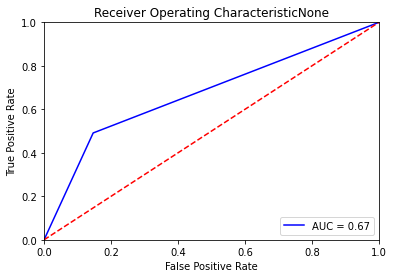

In [50]:
plotModel(stacker, X_test, y_test)

In [64]:
import time
from pomegranate import BayesianNetwork


tic = time.time()
# X = np.asarray(dfTrain.iloc[:10000,:])
X = np.asarray(dfTrain)
model = BayesianNetwork.from_samples(X, n_jobs = 8, algorithm='chow-liu') # << Default BNSL setting
t = time.time() - tic
p = model.log_probability(X).sum()

print("Greedy")
print("Time (s): ", t)
print("P(D|M): ", p)


Greedy
Time (s):  1.333531379699707
P(D|M):  -425831.38738324813


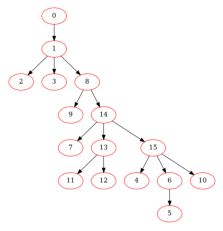

In [65]:
# print(model)
import matplotlib.pyplot as plt
import pygraphviz
model.plot()

In [66]:
count_y_y = 0
count_y_n = 0
count_n_y = 0
count_n_n = 0
y_pred = []

for i in range(0, X_test.shape[0]):
# for i in range(0, 1):
    if i % 1000 == 0:
        print(i, flush = True)
        print(count_y_y, count_y_n, count_n_y, count_n_n)
        
    testArg = list(X_test.iloc[i].values)
    testArg.append(None)
    res = model.predict_proba([testArg])
    tmp = res[0][-1].parameters[0][1] 
    if tmp > 0.5:
        tmp = 1
#         print(y_test.iloc[i], tmp)
        if y_test.iloc[i] == tmp:
            count_y_y += 1
        else:
            count_n_y += 1

    else:
        tmp = 0
        if y_test.iloc[i] == tmp:
            count_n_n += 1
        else:
            count_y_n += 1
    y_pred.append(tmp)
print(count_y_y, count_y_n, count_n_y, count_n_n)
# X_test.iloc[0].values

0
0 0 0 0
1000
68 38 220 674
2000
146 74 442 1338
3000
234 104 639 2023
4000
309 145 841 2705
5000
380 174 1055 3391
6000
445 206 1280 4069
7000
524 243 1497 4736
8000
592 289 1710 5409
9000
690 329 1907 6074
10000
752 369 2119 6760
777 383 2180 6957


In [67]:
y_test = list(y_test.values)

Confusion Matrix:
 [[6957 2180]
 [ 383  777]]
Recall is: 0.6698275862068965


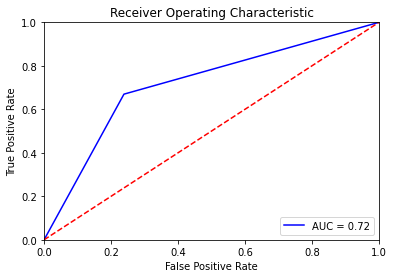

In [68]:
cmat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cmat)
trec = recall_score(y_test, y_pred)
print('Recall is:', trec)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = (metrics.auc(fpr, tpr))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
import time
from pomegranate import BayesianNetwork


tic = time.time()
# X = np.asarray(dfTrain.iloc[:10000,:])
X = np.asarray(dfTrain)
model = BayesianNetwork.from_samples(X, n_jobs = 8, algorithm='greedy') # << Default BNSL setting
t = time.time() - tic
p = model.log_probability(X).sum()

print("Greedy")
print("Time (s): ", t)
print("P(D|M): ", p)


Greedy
Time (s):  251.0788974761963
P(D|M):  -411710.8307464118


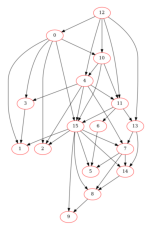

In [71]:
# print(model)
import matplotlib.pyplot as plt
import pygraphviz
model.plot()

In [74]:
count_y_y = 0
count_y_n = 0
count_n_y = 0
count_n_n = 0
y_pred = []

for i in range(0, X_test.shape[0]):
# for i in range(0, 1):
    if i % 1000 == 0:
        print(i, flush = True)
        print(count_y_y, count_y_n, count_n_y, count_n_n)
        
    testArg = list(X_test.iloc[i].values)
    testArg.append(None)
    res = model.predict_proba([testArg])
    tmp = res[0][-1].parameters[0][1] 
    if tmp > 0.5:
        tmp = 1
#         print(y_test.iloc[i], tmp)
        if y_test[i] == tmp:
            count_y_y += 1
        else:
            count_n_y += 1

    else:
        tmp = 0
        if y_test[i] == tmp:
            count_n_n += 1
        else:
            count_y_n += 1
    y_pred.append(tmp)
print(count_y_y, count_y_n, count_n_y, count_n_n)
# X_test.iloc[0].values

0
0 0 0 0
1000
61 45 175 719
2000
136 84 353 1427
3000
223 115 521 2141
4000
302 152 694 2852
5000
369 185 847 3599
6000
431 220 1020 4329
7000
513 254 1196 5037
8000
577 304 1370 5749
9000
679 340 1527 6454
10000
741 380 1720 7159
765 395 1776 7361


Confusion Matrix:
 [[7361 1776]
 [ 395  765]]
Recall is: 0.6594827586206896


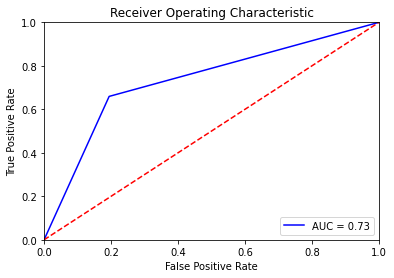

In [76]:
cmat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cmat)
trec = recall_score(y_test, y_pred)
print('Recall is:', trec)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = (metrics.auc(fpr, tpr))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()